# Assignment: Unsupervised Machine Learning \ Clustering

## Part 1: Partitional Clustering

In this assignment you will experience with partitional & mixture model clustering. The analyses are made on real datasets under the circumstances of real life challenges in unsupervised machine learning.

In [16]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Read blood test results as an EMR from an Excel file

In [17]:
# Open the file
xlsx = pd.ExcelFile('EMR-Blood.xlsx')

# Get the first sheet as an object
sheet1 = xlsx.parse(0)

# Set the Key column as the index
sheet1.set_index("Key", inplace=True)

# Show first 10 rows
sheet1.head(10)

,Na,K,ALT,AST,WBC,RBC,Hgb,Hct
Key,,,,,,,,
1,141,4.65,31.92,35.01,10.25,4.06,17.6,36.3
2,140,4.96,36.41,16.70,6.13,3.80,13.2,35.6
3,136,3.66,41.43,13.17,5.86,4.26,16.2,43.7
4,136,4.74,23.92,30.33,10.80,4.83,16.1,49.8
5,140,4.74,43.66,20.44,6.59,4.05,12.6,39.1
6,146,3.98,48.41,33.22,4.53,4.04,17.9,47.3
7,144,5.29,44.29,19.28,10.12,3.96,17.2,47.9
8,138,4.57,50.43,16.39,4.66,4.91,13.7,41.5
9,144,3.96,31.51,34.87,4.57,4.72,15.1,47.6


### Blood Test Abbreviations
- Na == Sodium
- K == Potassium
- ALT == Alanine transaminase
- AST == Aspartate transaminase
- WBC == White blood cells
- RBC == Red blood cells
- Hgb == Hemoglobin
- Hct == Hematocrit

### Use K-Means to create clusters according to variables of uniform distribution

In [4]:
#Retrieve the K, WBC and Hgb column values from the dataset to cluster
variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values

# Run the K-Means algorithm, assuming the correct number of clusters is 5
y_pred_KMeans1 = KMeans(n_clusters=5,
max_iter=999, n_init=10, random_state=0, ).fit(EMR3d1).labels_


### Make a 3D chart

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


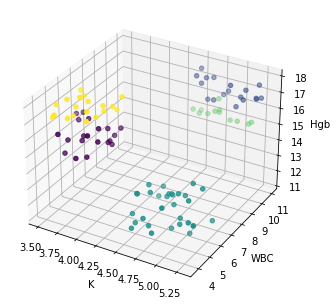

In [5]:
def make_chart (chart_data, y_pred, labels):
    fig = plt.figure()
    ax = Axes3D(fig,)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c = y_pred)

make_chart(EMR3d1, y_pred_KMeans1, variables1)

In [6]:
x = np.random.randint(0,10, size = (10,3))
k = 2
centroids = x[np.random.randint(x.shape[0], size=k), :]
print(x.shape)
print(centroids)

(10, 3)
[[4 8 6]
 [2 1 5]]


## Task 1 (_max score - 50 points_)
Implement  Lloyd's Algorithm for solving the K-Means problem, as shown in class. 
By examining the WCSS, choose a proper threshold to determine algorithm convergence.

Check your algorithm on 'EMR-Blood.xlsx' dataset. Compare your results to the _sklearn_ version - what can affect any differences you might've got?

In [7]:
# Add your code for Challenge 210 after this line, and keep it in this cell.

# Implement K-Means (X being the data)
class k_means:
    def __init__(self):
        pass
    def fit(self, x, k):
        self.x = np.array(x)
        self.k = k
        #Initiate centroid locations
        # centroids = x[np.random.randint(x.shape[0], size=k), :] #choose random points from out data as centroid initiations.
        centroids = x[np.random.choice(x.shape[0], size = self.k, replace = False), :] #Choose points already in X as initiation.

        prev = 1000000
        WCSS = 100000
        iterations = 1
        while np.abs(prev-WCSS) >= 0.001:
            prev = WCSS
            #Calculate distances of each point to each centroid, and update class to that centroid
            euc = np.array([np.linalg.norm(points - centroids, axis = 1) for points in self.x])
            labels = np.argmin(euc, axis = 1)
            
            # calculate WCSS, then calculate new central positions if it has not converged yet.
            WCSS = 0
            for cent in range(self.k):
                WCSS = np.sum(np.linalg.norm((centroids[cent] - self.x[labels == cent]), axis = 1)**2 )
    
            iterations +=1
            if prev - WCSS <= 0.01: #iterate until WCSS convergence
                self.labels = labels
                self.WCSS = WCSS
                self.centroids = centroids
            # print(f'k: {k}, iterations: {iterations}')
            else:
                centroids = [np.average(self.x[labels==cent], axis = 0) for cent in range(self.k)]
            
            # print(prev)
            # print(WCSS)
    
    def predict(self, X):
        self.X = np.array(X)
        euc = np.array([np.linalg.norm(self.centroids - points, axis = 1) for points in self.x])
        labels = np.argmin(euc, axis = 1)
        return labels



C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


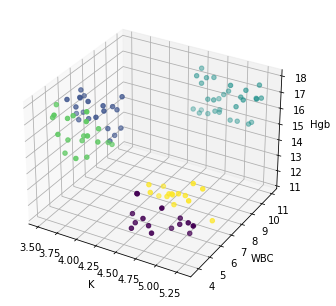

In [8]:
km = k_means()
km.fit(EMR3d1, 5)
make_chart(EMR3d1, km.labels, variables1)

## Task 2 (_max score - 30 points_)

Humans can clearly spot 3 clusters, however, for machines it's much harder to "learn" that. In the above implementation, K-Means was given the value of 5 as K.
Develop a **generic** mechanism for finding the most reasonable number of clusters by:
1. Iterating K over a reasonable range, which should be derived from the number of points
2. Choose a proper K based on the heuristics learned in class
3. Showing the final clusters in a 3D chart (for your implementation of K-Means algorithm)

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


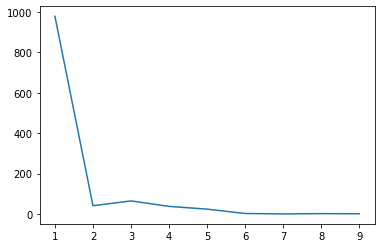

In [9]:
# Add your code for Challenge 211 after this line, and keep it in this cell.
WCSS = []
k_range = round(np.sqrt(len(EMR3d1)))
k_vals = np.arange(1,k_range,1)
for k in k_vals:
    km = k_means()
    km.fit(EMR3d1, k)
    WCSS.append(km.WCSS)

plt.plot(k_vals, WCSS)

Using the Elbow method, we detect that the optimal k is at k= 3. Visually, this sits well. When we graph the points on a 3d graph with k = 3, we can see that the groupings look very smooth and logical.

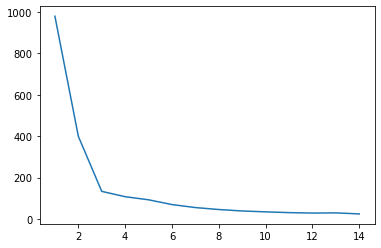

In [10]:
# Using sklearn
WCSS = []
k_vals = np.arange(1,15,1)

for k in k_vals:
    km = KMeans(k, init = 'random')
    km.fit(EMR3d1)
    WCSS.append(km.inertia_)

plt.plot(k_vals, WCSS)

### Silhouette analysis

Use graphic visualization of the Silhouette score to support your above answer:

For n_clusters = 2 The average silhouette_score is : 0.5738344190137955
For n_clusters = 3 The average silhouette_score is : 0.644343998493909
For n_clusters = 4 The average silhouette_score is : 0.45147739563766875
For n_clusters = 5 The average silhouette_score is : 0.5184079933829164
For n_clusters = 6 The average silhouette_score is : 0.46421278769955215


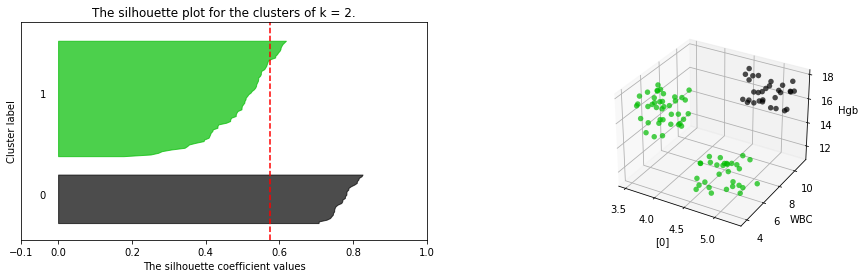

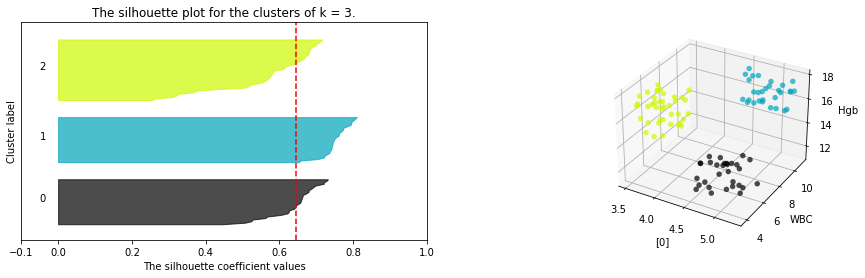

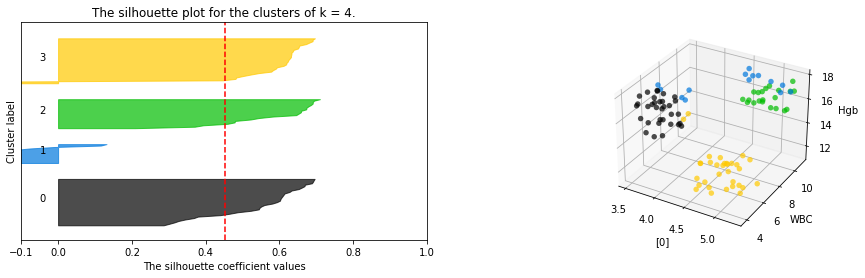

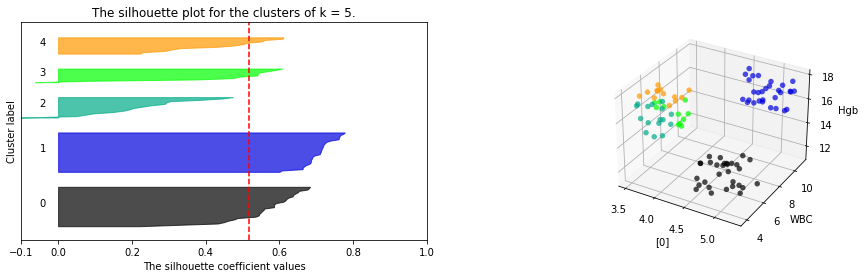

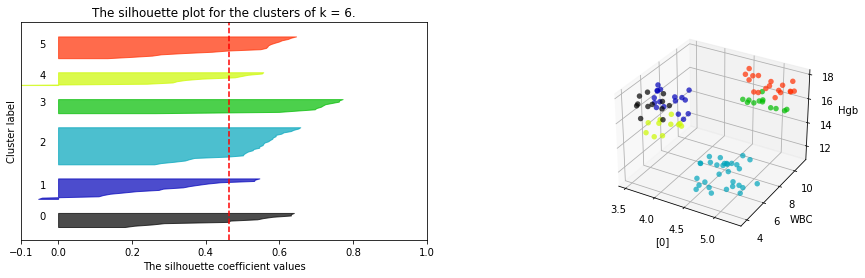

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
k_vals = [2,3,4,5,6]

X = EMR3d1
for k in k_vals:
    fig = plt.figure(figsize = (16,4)) 
    ax1 = fig.add_subplot(1,2,1) # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (k + 1) * 10 ]) # The (k+1)*10 is for better spacing between sillouhettes.

    #run kmeans
    km = k_means()
    km.fit(X, k)
    predicted_labels = km.labels

    sample_silhouette_values = silhouette_samples(X, predicted_labels) # Compute the silhouette scores for each sample

    y_lower = 10 #shift the sillouhettes up for better spacing.
    for i in range(k): # Aggregate the silhouette scores for samples belonging to # cluster i, and sort them
        sil_value_i = sample_silhouette_values[predicted_labels == i]
        sil_value_i.sort()

        size_cluster_i = sil_value_i.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / k)

        #Plot the Silhouttes
        ax1.fill_betweenx(
            y = np.arange(y_lower, y_upper),
            x1 = 0,
            x2 =sil_value_i,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    ax1.set_title(f"The silhouette plot for the clusters of k = {k}.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # Calculate the silhouette_score- the average for all of the silhouttes.
    silhouette_avg = silhouette_score(X, predicted_labels)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg,)
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    ax2 = fig.add_subplot(1,2,2, projection = '3d') # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(predicted_labels.astype(float) / k)

    # Axes3D(fig,)
    
    ax2.set_xlabel([0])
    ax2.set_ylabel(variables1[1])
    ax2.set_zlabel(variables1[2])
    ax2.scatter(EMR3d1[:,0], EMR3d1[:,1], EMR3d1[:,2], s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
    # make_chart(EMR3d1, cluster_labels, variables1)
plt.show()

#### From this section on - please use the sklearn's K-means

## Part 2: Mixture Models Clustering 

https://www.youtube.com/watch?v=iQoXFmbXRJA&ab_channel=VictorLavrenko (good video)

### Use K-Means to create clusters according to variables of both uniform and Gaussian distributions

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


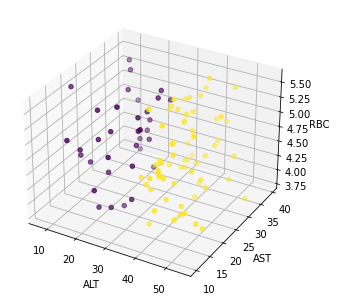

In [18]:
# Retrieve the ALT, AST and RBC column values from the dataset to cluster
variables2 = ["ALT","AST","RBC"]
EMR3d2 = sheet1.loc[:, variables2].values

# Run the K-Means algorithm
# NOTICE, this time, we know that the correct number of clusters is 2
y_pred_KMeans2 = KMeans(2, init='k-means++', max_iter=300, n_init=10, random_state = 0).fit(EMR3d2).labels_

# Make a 3D chart
make_chart(EMR3d2, y_pred_KMeans2, variables2)

## Task 3 (_max score - 20 points_)
Scientists have found that in this population of patients, RBC distribution is uniform, ALT distribution is a Gaussian and AST distribution is a mixture of two Gaussians. Clearly, even by giving K-Means the correct K, the algorithm got to the wrong conclusion. This separation is "technically" correct, but lacks some underlying understanding of the natural phenomena.

What is the "problem" with this separation?

In [13]:
# Your answer here


In order to exploit the Gaussian characteristic of the AST
1. Find the 2 componenets that comprise the AST feature by applying the GMM algorith with the proper number of components.
2. Assume that the clusters above are correct for the entire dataset (including the other features).
3. Show the final clusters (of EMR3d2) in a 3D chart

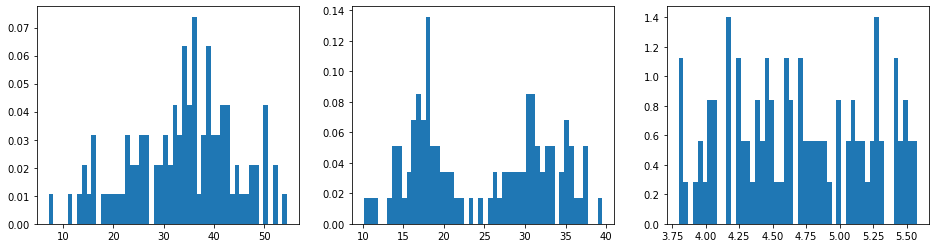

In [14]:
import scipy
plt.figure(figsize = (16, 4))
for i in range(EMR3d2.shape[1]):
    x = sorted(EMR3d2[:, i])
    plt.subplot(1,3,i+1)
    plt.hist(x, bins = 50, density = True)

    # normal = scipy.stats.norm(np.mean(x), np.std(x))
    # plt.plot(x, normal.pdf(x));


The parameters of the first Gaussian are mean = [31.76263257], and variance = [[12.61002424]]
The parameters of the second Gaussian are mean = [17.24934496], and variance = [[7.98567696]]


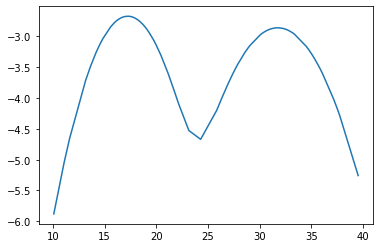

In [22]:
from sklearn.mixture import GaussianMixture

data = np.array(EMR3d2[:,1]).reshape(-1,1)
clf = GaussianMixture(n_components=2, covariance_type='full')
clf.fit(data)

x = np.array(sorted(data)).reshape(-1,1)
y = clf.score_samples(x)

print(f'The parameters of the first Gaussian are mean = {clf.means_[0]}, and variance = {clf.covariances_[0]}')
print(f'The parameters of the second Gaussian are mean = {clf.means_[1]}, and variance = {clf.covariances_[1]}')

plt.plot(x, y)
plt.show()

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package 

Text(0.5, 0.92, 'GMM')

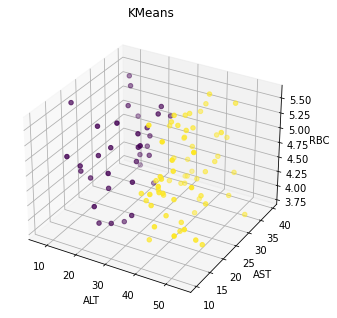

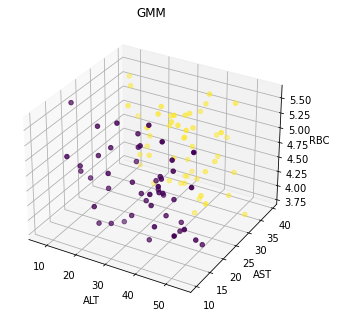

In [25]:
make_chart(EMR3d2, y_pred_KMeans2, variables2)
plt.title('KMeans')

gmm = GaussianMixture(2)
gmm.fit(data)
gm_labels = gmm.predict(data)

make_chart(EMR3d2, gm_labels, variables2) #Predicted just based of AST. Not sure why we would do this though...
plt.title('GMM')

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package 

Text(0.5, 0.92, 'GMM')

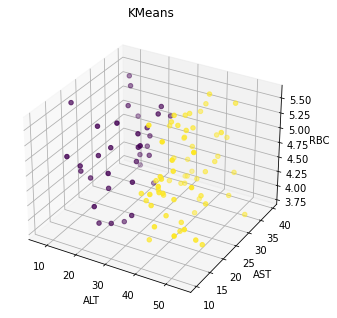

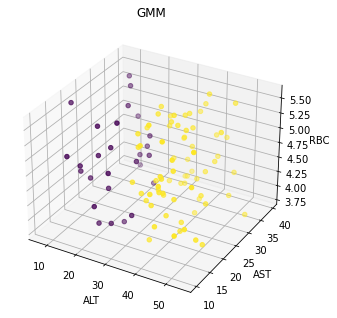

In [ ]:

make_chart(EMR3d2, y_pred_KMeans2, variables2)
plt.title('KMeans')

gm = GaussianMixture(2)
gm.fit(EMR3d2)
gm_labels = gm.predict(EMR3d2)

make_chart(EMR3d2, gm_labels, variables2) #predicted based off of all of the features. Don't see much of a difference between this and K means though
plt.title('GMM')

What is the difference between the two clustering results above?

Which one, given the domain knowledge provided to you, makes more sense?




# Good Luck!



C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


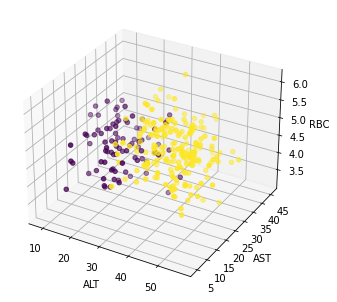

In [ ]:
#Showing how it is a generative model
X_new, y_new = gm.sample(300)
make_chart(X_new, y_new, variables2 )